In [21]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("delitos_2023.csv")

C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_1608\3533461224.py:3: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("delitos_2023.csv")


In [11]:
df.fillna(0,inplace=True)
df.isnull()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
157457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
157458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
157459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.dropna(inplace=True)
df.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,1,2023,enero,LUN,2023-01-02,19,Vialidad,Muertes por siniestros viales,NO,NO,BELGRANO,13,"-58,445,747","-34,559,570",1
1,2,2023,enero,MIE,2023-01-11,11,Vialidad,Muertes por siniestros viales,NO,NO,VILLA LUGANO,8,"-58,476,557","-34,673,096",1
2,3,2023,enero,VIE,2023-01-13,4,Vialidad,Muertes por siniestros viales,NO,NO,SAAVEDRA,12,"-58,485,670","-34,544,011",1
3,4,2023,enero,VIE,2023-01-13,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,"-58,451,874","-34,636,364",1
4,5,2023,enero,VIE,2023-01-13,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,"-58,451,874","-34,636,364",1


In [17]:
print(df.describe())
df['fecha'] = pd.to_datetime(df['fecha'])
print(df.info())

             id-mapa      anio         franja  cantidad
count  157461.000000  157461.0  157461.000000  157461.0
mean    78731.000000    2023.0      12.951766       1.0
std     45455.219706       0.0       6.410010       0.0
min         1.000000    2023.0       0.000000       1.0
25%     39366.000000    2023.0       8.000000       1.0
50%     78731.000000    2023.0      13.000000       1.0
75%    118096.000000    2023.0      18.000000       1.0
max    157461.000000    2023.0      23.000000       1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157461 entries, 0 to 157460
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id-mapa   157461 non-null  int64         
 1   anio      157461 non-null  int64         
 2   mes       157461 non-null  object        
 3   dia       157461 non-null  object        
 4   fecha     157461 non-null  datetime64[ns]
 5   franja    157461 non-null  int64         
 6   tipo

           mes  counts
0        abril   12690
1       agosto   13312
2    diciembre   14301
3        enero   12037
4      febrero   11475
5        julio   13383
6        junio   12469
7        marzo   14180
8         mayo   13425
9    noviembre   13598
10     octubre   13320
11  septiembre   13271


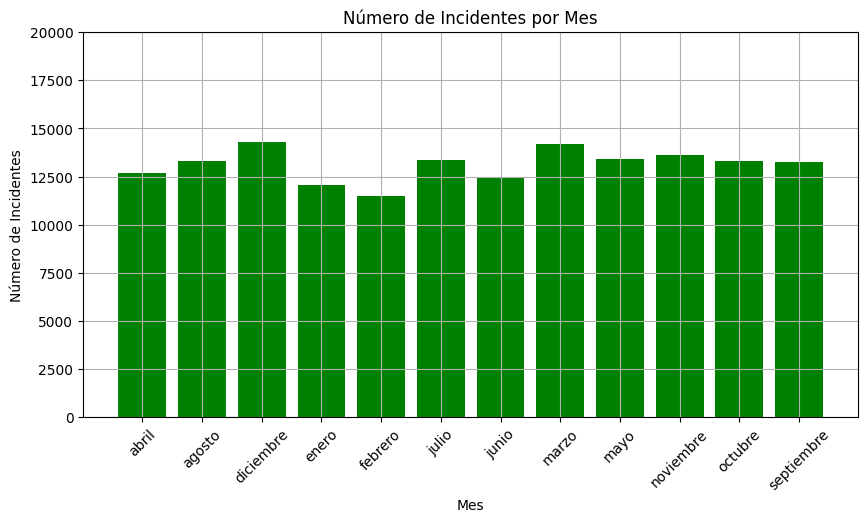

In [97]:

incidentes_mes = df.groupby('mes').size().reset_index(name='counts')

inc_vialidad = df[df['tipo'] == 'vialidad']


inc_vialidad_mes = df.groupby('mes')['tipo'].apply(lambda x: (x == 'Vialidad').sum()).reset_index(name='counts')
inc_robo_mes = df.groupby('mes')['tipo'].apply(lambda x: (x == 'Robo').sum()).reset_index(name='counts')
inc_homicidio_mes = df.groupby('mes')['tipo'].apply(lambda x: (x == 'Homicidio').sum()).reset_index(name='counts')
inc_amenazas_mes = df.groupby('mes')['tipo'].apply(lambda x: (x == 'Amenazas').sum()).reset_index(name='counts')
inc_lesiones_mes = df.groupby('mes')['tipo'].apply(lambda x: (x == 'Lesiones').sum()).reset_index(name='counts')
inc_hurto_mes = df.groupby('mes')['tipo'].apply(lambda x: (x == 'Hurto').sum()).reset_index(name='counts')
# print(inc_vialidad_mes)
# print(inc_robo_mes)
# print(inc_homicidio_mes)
# print(inc_amenazas_mes)
# print(inc_lesiones_mes)
# print(inc_hurto_mes)
print(incidentes_mes)

plt.figure(figsize=(10, 5))
plt.grid()
plt.ylim(0, 20000)
plt.bar(incidentes_mes['mes'], incidentes_mes['counts'], color='green')
plt.xlabel('Mes')
plt.ylabel('Número de Incidentes')
plt.title('Número de Incidentes por Mes')
plt.xticks(rotation=45)
plt.savefig('./Landing_page_Delitos_Buenos_Aires/src/assets/incidentes_mes.png',dpi=300,bbox_inches="tight")
plt.show()